### Main goal of this notebook is preparing visualization of given dataset using PCA(n_conmponents =2) and choosing the strongest features of RF classifier using `eli5` library.

We want to check if we can divide poisonous and edible mushrooms easily.

### Imports and basic data exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Dataframe consists of categorical features.

We need to transform features into numeric type to perform PCA.
First let's try to find any missing values in columns.

In [3]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Now, let's check if there are any features with only one value.

In [4]:
classes_with_max_1_value = [i for i in df.columns if df[i].value_counts().shape[0] < 2]
classes_with_max_1_value

['veil-type']

Histogram for confirmation.

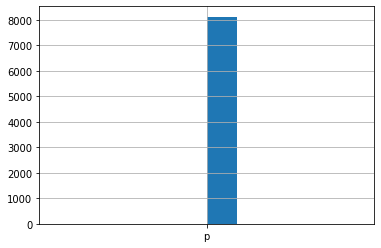

In [5]:
df['veil-type'].hist()

We can drop `veil-type` column - this is a redundant feature.

In [6]:
print('Before: ', df.shape)

df = df.drop(columns=classes_with_max_1_value)

print('After: ' , df.shape)

Before:  (8124, 23)
After:  (8124, 22)


### Transforming dataset

We want to vizualize our data using 2 principal components and label this data with `df['class']` values to see if poisonous and edible mushrooms can be easily divided. 

First, we need to split dataset to X and y and transform X into numerical values. To avoid wrong interpretation of features with multiple categorical values, we will transform features (X) into dummy data.

In [7]:
y = df.iloc[:,0] # class column
X = df.iloc[:,1:] 
X_dummies = pd.get_dummies(X)
X_dummies

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


### PCA with 2 PC

In [8]:
from sklearn.decomposition import PCA

In [9]:
model = PCA(n_components=2).fit(X_dummies.values)
pca_components = model.transform(X_dummies.values)
pca_df = pd.DataFrame(data = pca_components, columns=['pc_1', 'pc_2'])

In [10]:
model.explained_variance_ratio_.sum()

0.307006341507273

In [11]:
pca_df['class'] = y
pca_df.head()

,pc_1,pc_2,class
0,-0.996245,-0.946892,p
1,-1.441733,-0.164154,e
2,-1.524085,-0.408746,e
3,-1.151800,-0.675820,p
4,-0.617503,-0.996143,e


# Scatter plot for PCA results

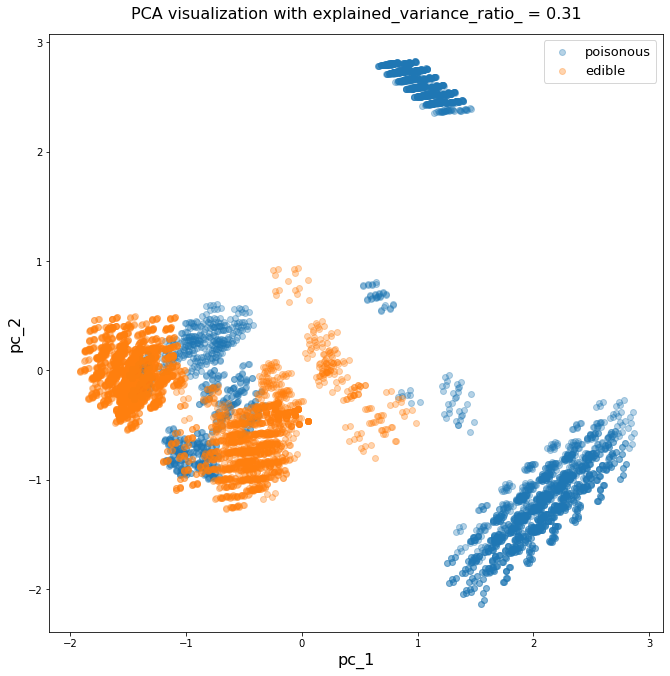

In [12]:
classes = pca_df['class'].unique()
labels = {'e': 'edible', 'p': 'poisonous'}

fig = plt.figure(figsize=(11,11))
for i in classes:
    temp = pca_df[pca_df['class'] == i]
    plt.scatter(temp['pc_1'], temp['pc_2'], alpha=0.33, label = labels[i])
    plt.legend(prop={'size': 13})
    plt.xlabel('pc_1', fontdict= {'fontsize': 16})
    plt.ylabel('pc_2', fontdict= {'fontsize': 16})
    plt.title('PCA visualization with explained_variance_ratio_ = ' + str(round(model.explained_variance_ratio_.sum(), 2)), fontdict= {'fontsize': 16}, pad = 15)
plt.show()

### Comments:

- Although 116 columns were created when the features were changed to 'dummy data', variance_ratio was obtained at 0.31 and the visualization allows to divide the data into two main clusters. 
- When in the future we use more features in the classification models (from 5 to 7), there should be no major problem with obtaining a well-functioning model with high precision and recall.

# Random Forrest classification

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import eli5 #install package if not installed with conda-forge
from eli5.sklearn import  PermutationImportance

from random import randint

C:\Users\EDSMAZIE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\EDSMAZIE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [14]:
def eli5_top10_weights(X, y, test_size):
    """ 
    Chooses 10 strongest features, which are influencing RF model.
    Prints model score for train set, test set, confusion matrix and classification report
    Parameters: 
    X (pd.DataFrame): observations
    y (pd.Series): targets
    test_size
    Returns: 
    results (dict): 
        'train_score': float,
        'test_score': float,
        'confusion_matrix': ndarray, 
        'clasification_report': string / dict, 
        'top_10_feats_weights': pd.DataFrame
  
    """
    x_train, x_test, y_train, y_test = train_test_split(X.values, y, test_size = test_size, random_state = randint(0,20))
    model = RandomForestClassifier(max_depth=7).fit(x_train, y_train)
    
    print('='*60 +"\n")
    print('Score train: ', model.score(x_train, y_train))
    
    y_pred = model.predict(x_test)
    
    print('Score test: ', accuracy_score(y_test, y_pred))
    print('\nConfusion matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('\nClassification report:')
    print(classification_report(y_test,y_pred))
    print('='*60 +"\n")
    
    perm = PermutationImportance(model).fit(x_train,y_train)
    
    results = {'train_score': model.score(x_train, y_train),
               'test_score': accuracy_score(y_test, y_pred),
              'confusion_matrix': confusion_matrix(y_test, y_pred),
              'clasification_report' : classification_report(y_test,y_pred),
              'top_10_feats_weights' : eli5.explain_weights_df(perm, feature_names = X_dummies.columns.tolist())[:10]}
    return results


### Creating 10 Random F classifiers and retrieving 10 strongest features of each forest.

In [15]:
results = [eli5_top10_weights(X_dummies, y, 0.25) for i in range(10)]


Score train:  1.0
Score test:  1.0

Confusion matrix:
[[1023    0]
 [   0 1008]]

Classification report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1023
           p       1.00      1.00      1.00      1008

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



Score train:  1.0
Score test:  1.0

Confusion matrix:
[[1072    0]
 [   0  959]]

Classification report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1072
           p       1.00      1.00      1.00       959

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



Score train:  1.0
Score test:  1.0

Confusion matrix:
[[1076    0]
 [   0  955]]

Classification report:
              precision   

### Counting number of features in results

In [16]:
feats_counter ={}

for i in results:
    temp_feats = i['top_10_feats_weights'].feature
    for feat in temp_feats:
        if feat in feats_counter:
            feats_counter[feat] += 1
        else:
            feats_counter[feat] = 1
feats_counter

{'spore-print-color_r': 10,
 'odor_n': 9,
 'gill-size_b': 10,
 'gill-size_n': 10,
 'odor_f': 3,
 'bruises_t': 4,
 'spore-print-color_w': 6,
 'ring-type_p': 2,
 'population_c': 2,
 'habitat_d': 1,
 'population_v': 6,
 'stalk-shape_t': 4,
 'stalk-shape_e': 4,
 'stalk-root_c': 1,
 'gill-color_k': 1,
 'odor_y': 3,
 'gill-attachment_a': 3,
 'gill-attachment_f': 3,
 'gill-spacing_c': 3,
 'gill-spacing_w': 2,
 'habitat_m': 1,
 'gill-color_h': 1,
 'stalk-root_b': 4,
 'bruises_f': 2,
 'ring-number_t': 2,
 'stalk-root_?': 2,
 'ring-number_o': 1}

### Counting number of features before dummy data transformation

In [26]:
main_feats = {}

for feat in feats_counter:
    feat_name = feat.split('_')[0]
    if feat_name in main_feats:
        main_feats[feat_name] += feats_counter[feat]
    else:
        main_feats[feat_name] = feats_counter[feat]

main_feats = sorted(main_feats.items(), key=lambda item: item[1], reverse=True)
main_feats

[('gill-size', 20),
 ('spore-print-color', 16),
 ('odor', 15),
 ('population', 8),
 ('stalk-shape', 8),
 ('stalk-root', 7),
 ('bruises', 6),
 ('gill-attachment', 6),
 ('gill-spacing', 5),
 ('ring-number', 3),
 ('ring-type', 2),
 ('habitat', 2),
 ('gill-color', 2)]

### Chossing 5 most common main features

In [88]:
feats_final_list = [i[0] for i in main_feats[:5]]
feats_final_list

['gill-size', 'spore-print-color', 'odor', 'population', 'stalk-shape']

### Creating all necessary dummy features from chosen main features.

In [89]:
dummies_feats = [i for i in X_dummies.columns if i.startswith(tuple(feats_final_list))]
dummies_feats

['odor_a',
 'odor_c',
 'odor_f',
 'odor_l',
 'odor_m',
 'odor_n',
 'odor_p',
 'odor_s',
 'odor_y',
 'gill-size_b',
 'gill-size_n',
 'stalk-shape_e',
 'stalk-shape_t',
 'spore-print-color_b',
 'spore-print-color_h',
 'spore-print-color_k',
 'spore-print-color_n',
 'spore-print-color_o',
 'spore-print-color_r',
 'spore-print-color_u',
 'spore-print-color_w',
 'spore-print-color_y',
 'population_a',
 'population_c',
 'population_n',
 'population_s',
 'population_v',
 'population_y']

### Traning final model on chosen dummy features

In [96]:
x_train, x_test, y_train, y_test = train_test_split(X_dummies[dummies_feats].values, y, test_size = 0.25)
x_train.shape

(6093, 28)

In [97]:
model = RandomForestClassifier().fit(x_train, y_train)
print('Score train: ', model.score(x_train, y_train))
y_pred = model.predict(x_test)
print('Score test: ', accuracy_score(y_test, y_pred))
print('\nConfusion matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification report:')
print(classification_report(y_test,y_pred))

Score train:  0.9963892991957984
Score test:  0.9950763170851797

Confusion matrix:
[[1050    0]
 [  10  971]]

Classification report:
              precision    recall  f1-score   support

           e       0.99      1.00      1.00      1050
           p       1.00      0.99      0.99       981

    accuracy                           1.00      2031
   macro avg       1.00      0.99      1.00      2031
weighted avg       1.00      1.00      1.00      2031



Final model's metrics are unreasonably high. Let's investigate chosen features.

# Inspecting odor column:

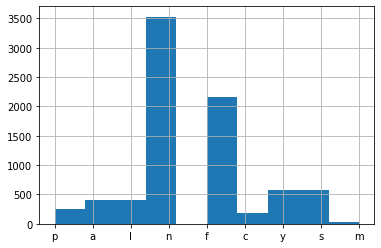

In [55]:
df.odor.hist()

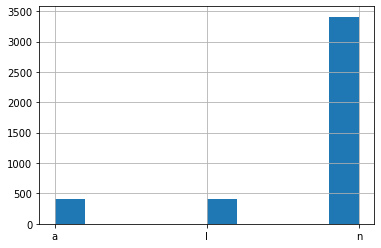

In [56]:
df.loc[df['class'] != 'p', 'odor'].hist()

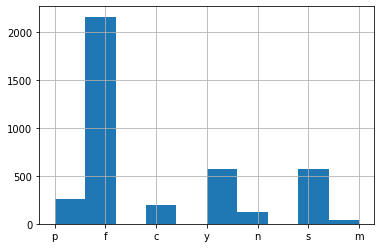

In [57]:
df.loc[df['class'] == 'p', 'odor'].hist()

In [58]:
poisonous_list = df.loc[df['class'] == 'p', 'odor'].value_counts().index
poisonous_list

Index(['f', 's', 'y', 'p', 'c', 'n', 'm'], dtype='object')

In [59]:
edible_list = df.loc[df['class'] == 'e', 'odor'].value_counts().index
edible_list

Index(['n', 'a', 'l'], dtype='object')

In [60]:
list(set(poisonous_list).intersection(edible_list))

['n']

In [37]:
df.loc[df['odor'] == 'n', 'class'].value_counts()

e    3408
p     120
Name: class, dtype: int64

# Conclusion:

Using odor column we can expect extremely high 98-99 % accurancy score for this dataset because intersection between `odor` feature values for `poisonous` and `edible` mushrooms is only one symbol: `n`.